# Labo 9 - Data preprocessing en samenvattende opdracht

In dit labo focussen we ons deels op het opkuisen van data en meerbepaald het omgaan met missing values. Daarnaast geven de opdrachten ook de gelegenheid de reeds geziene Python kennis nog eens toe te passen op een omvangrijke dataset. 
Ook worden nog een aantal extra visualisatietechnieken bekeken. Onderandere hoe je geografische data op een wereldkaart kan plaatsen met behulp van Geopandas.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500)

## Demos

### Data cleaning

Beschouw de zwangerschapsdiabetes dataset waar een aantal ontbrekende en foutieve waarden aanwezig zijn. 
Stap voor stap zal deze dataset worden opgekuist.

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0


#### Aantal ontbrekende waarden opvragen

In [7]:
# aantal missing values

missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 3
Glucose                     2
BloodPressure               7
SkinThickness               3
Insulin                     5
BMI                         3
DiabetesPedigreeFunction    3
Age                         0
Outcome                     1
dtype: int64


In [8]:
# Toon de rijen met ontbrekende waarden

null_data = dataset[dataset.isnull().any(axis=1)]
null_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
12,10.0,139.0,NaN,0.0,0.0,27.1,1.441,57,0.0
22,7.0,196.0,90.0,0.0,0.0,NaN,0.451,41,1.0
44,7.0,159.0,64.0,NaN,0.0,27.4,0.294,40,0.0
113,4.0,76.0,NaN,0.0,0.0,34.0,0.391,25,0.0
167,4.0,120.0,NaN,0.0,0.0,29.6,0.709,34,0.0
179,NaN,130.0,82.0,0.0,0.0,39.1,0.956,37,1.0
180,6.0,87.0,80.0,0.0,NaN,23.2,0.084,32,0.0
182,1.0,0.0,74.0,20.0,23.0,27.7,NaN,21,0.0
188,8.0,109.0,76.0,39.0,NaN,27.9,0.640,31,1.0


#### Listwise deletion

Dit betekent dat alle rijen worden verwijderd waar er minstens 1 ontbrekende waarde voorkomt.

In [10]:
# Listwise deletion: verwijder alle rijen met missing values

dataset_dropna = dataset.dropna(axis=0)
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(dataset_dropna.isnull().sum()))
dataset_dropna.head(20)

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30,0.0


#### Substitutie van ontbrekende waarden door het gemiddelde

De ontbrekende waarde wordt vervangen door het gemiddelde van alle niet onbrekende waarden in die kolom.

In [11]:
# Gemiddelde substitutie
dataset = pd.read_csv('diabetes.csv')
gemiddelde = dataset.mean()
print(gemiddelde)

dataset = dataset.fillna(dataset.mean())
dataset.head(20)

Pregnancies                   3.850980
Glucose                     120.890339
BloodPressure                68.872536
SkinThickness                20.568627
Insulin                      79.943644
BMI                          31.975556
DiabetesPedigreeFunction      0.894133
Age                          33.240885
Outcome                       0.349413
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00000,148.0,72.000000,35.0,0.0,33.6,0.627,50,1.0
1,1.00000,85.0,66.000000,29.0,0.0,26.6,0.351,31,0.0
2,8.00000,183.0,64.000000,0.0,0.0,23.3,0.672,32,1.0
3,1.00000,89.0,66.000000,23.0,94.0,28.1,0.167,21,0.0
4,0.00000,137.0,40.000000,35.0,168.0,43.1,2.288,33,1.0
5,5.00000,116.0,74.000000,0.0,0.0,25.6,0.201,30,0.0
6,3.00000,78.0,50.000000,32.0,88.0,31.0,0.248,26,1.0
7,10.00000,115.0,0.000000,0.0,0.0,35.3,0.134,29,0.0
8,3.85098,197.0,70.000000,45.0,543.0,30.5,0.158,53,1.0
9,8.00000,125.0,96.000000,0.0,0.0,0.0,0.232,54,1.0


#### Onrealistische/foutieve waarden opsporen en opkuisen

In [7]:
# Opsporen van onrealistische waarden

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850980,120.890339,68.872536,20.568627,79.943644,31.975556,0.894133,33.240885,0.349413
std,3.365794,31.934556,20.173841,15.906574,115.162787,7.876856,11.642888,11.760232,0.476785
min,0.000000,0.000000,-94.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.632500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,323.000000,81.000000,1.000000


In [8]:
# Insuline gehalte moet groter zijn dan 0
dataset= dataset[dataset['Insulin'] > 0]
# SkinThickness moet groter zijn dan 0
dataset= dataset[dataset['SkinThickness'] > 0]
#Glucose gehalte moet groter zijn dan 0
dataset= dataset[dataset['Glucose'] > 0]
#BMI moet groter zijn dan 0
dataset= dataset[dataset['BMI'] > 0]
#Bloodpressure kan niet negatief zijn
dataset = dataset[dataset['BloodPressure']>0]

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.00000,391.000000,391.000000
mean,3.295913,122.493326,70.651196,29.093526,155.956089,33.063876,1.34998,30.813299,0.329923
std,3.186997,30.844609,12.353553,10.529405,119.056353,7.031518,16.31192,10.162698,0.470787
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.08500,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,77.000000,28.400000,0.27050,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.45200,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.500000,190.000000,37.050000,0.68950,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,323.00000,81.000000,1.000000


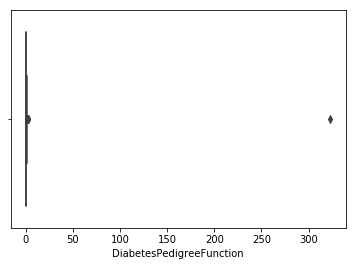

In [10]:
# Uitschieters bij de DiabetesPedigreeFunction

sns.boxplot(x=dataset['DiabetesPedigreeFunction'])

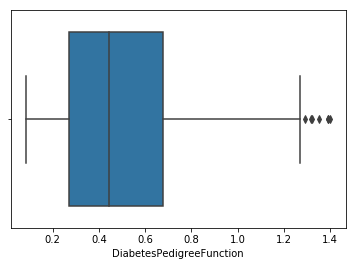

In [16]:
# Verwijderen van uitschieter bij DiabetesPedigreeFunction

gemiddelde = dataset['DiabetesPedigreeFunction'].mean()
stdafwijking = dataset['DiabetesPedigreeFunction'].std()

ondergrens = gemiddelde - 3* stdafwijking
bovengrens = gemiddelde + 3* stdafwijking

dataset = dataset[(dataset['DiabetesPedigreeFunction']<bovengrens) & (dataset['DiabetesPedigreeFunction']>ondergrens)]

sns.boxplot(x=dataset['DiabetesPedigreeFunction'])


In [17]:
# aantal overblijvende rijen in de dataset

dataset.shape

(384, 9)

### Interpolatie

Bij interpolatie proberen we (in tijdreeksen) de ontbrekende waarden te achterhalen op basis van de aangrenzende waarden.

In [18]:
dataset = pd.read_csv('temperaturen.csv')
dataset.head(20)

,tijdstip,temperatuur
0,0,7.0
1,1,10.0
2,2,15.0
3,3,NaN
4,4,27.0
5,5,33.0
6,6,29.0
7,7,43.0
8,8,NaN
9,9,NaN


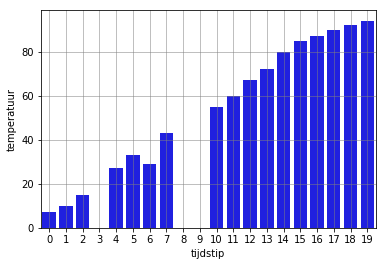

In [19]:
ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

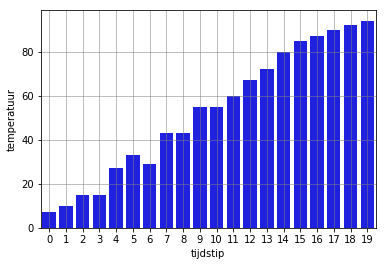

In [20]:
# interpolatie via dichtste waarde

dataset_interpolatie = dataset.interpolate(method ='nearest')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

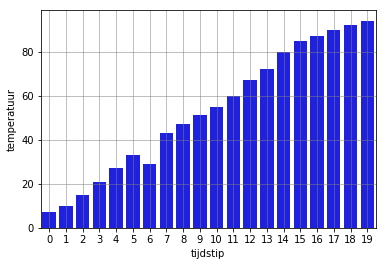

In [21]:
# interpolatie via lineaire interpolatie waarde

dataset_interpolatie = dataset.interpolate(method ='linear', limit_direction ='forward')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

### Resampling

In [47]:
dataset = pd.read_csv('stockprices.csv', parse_dates =['Date'])
dataset.tail(20)

,Date,Open,High,Low,Close,Volume,Name
2999,2017-12-01,69.80,71.25,69.47,70.10,19712943,AABA
3000,2017-12-04,71.06,71.34,68.16,68.31,15533597,AABA
3001,2017-12-05,67.10,69.38,66.62,68.13,11963099,AABA
3002,2017-12-06,67.78,69.62,67.36,69.41,11646582,AABA
3003,2017-12-07,69.75,70.64,69.48,70.22,7084564,AABA
3004,2017-12-08,71.00,71.63,70.82,71.25,7021125,AABA
3005,2017-12-11,71.70,72.09,71.15,71.53,7359312,AABA
3006,2017-12-12,71.07,71.15,69.55,69.77,11296188,AABA
3007,2017-12-13,69.80,71.76,69.69,71.24,17321301,AABA
3008,2017-12-14,70.60,70.62,68.84,69.23,17077065,AABA


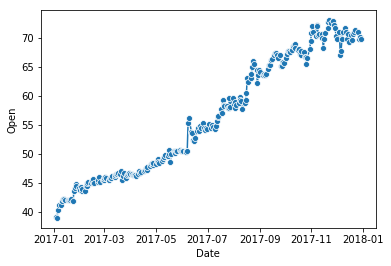

In [91]:
# Plotten van de openingskoers van 2017

dataset_2017 = dataset[pd.DatetimeIndex(dataset['Date']).year == 2017]
dataset_2017.head()

sns.lineplot(x ='Date',y='Open',data=dataset_2017,marker='o')

In [75]:
# Maandelijkse resampling
dataset_month = dataset_2017.resample('M', on='Date').mean()
dataset_month = dataset_month.reset_index()
dataset_month.head(20)


,Date,Open,High,Low,Close,Volume
0,2017-01-31,42.256000,42.628500,41.993000,42.425500,8.515003e+06
1,2017-02-28,44.916316,45.318947,44.651579,45.018421,7.192468e+06
2,2017-03-31,46.230870,46.540870,45.970435,46.268261,5.550294e+06
3,2017-04-30,47.207895,47.518421,46.963158,47.263684,6.918483e+06
4,2017-05-31,49.645909,50.044091,49.296364,49.725909,9.596977e+06
5,2017-06-30,53.327727,53.941364,52.619545,53.175909,4.943628e+07
6,2017-07-31,56.966000,57.538000,56.467500,57.067000,6.212384e+06
7,2017-08-31,61.336522,61.964348,60.763478,61.434783,5.878167e+06
8,2017-09-30,65.530000,66.081000,65.013500,65.538000,6.951704e+06
9,2017-10-31,67.611364,68.184091,67.093636,67.637727,5.671722e+06


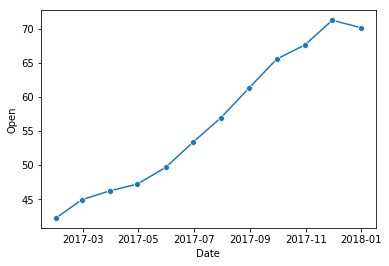

In [89]:
sns.lineplot(x ='Date',y='Open',data=dataset_month, marker='o')

## Plotten van geografische data

In [48]:
import geopandas
import matplotlib.pyplot as plt

dataset = pd.read_csv('earthquakes.csv')
dataset.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-10-17T06:26:49.390Z,35.973333,-117.704000,5.91,1.07,ml,16.0,122.0,0.07175,0.23,...,2019-10-17T06:30:31.724Z,"19km ENE of Little Lake, CA",earthquake,0.71,1.39,0.213,13.0,automatic,ci,ci
1,2019-10-17T06:21:50.313Z,62.912300,-151.294200,108.00,1.60,ml,NaN,NaN,NaN,0.40,...,2019-10-17T06:25:12.563Z,"89km NW of Talkeetna, Alaska",earthquake,NaN,2.10,NaN,NaN,automatic,ak,ak
2,2019-10-17T06:21:18.750Z,35.683500,-117.503833,5.98,1.37,ml,28.0,44.0,0.06779,0.14,...,2019-10-17T06:25:00.241Z,"13km SW of Searles Valley, CA",earthquake,0.21,0.69,0.145,19.0,automatic,ci,ci
3,2019-10-17T06:09:47.089Z,60.717500,-146.692600,22.50,1.60,ml,NaN,NaN,NaN,0.94,...,2019-10-17T06:13:00.017Z,"49km SSW of Valdez, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
4,2019-10-17T06:06:10.276Z,59.836400,-152.201600,91.60,1.60,ml,NaN,NaN,NaN,0.42,...,2019-10-17T06:11:19.270Z,"21km WNW of Anchor Point, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak


In [95]:
gdf = geopandas.GeoDataFrame(dataset, geometry=geopandas.points_from_xy(dataset.longitude, dataset.latitude))

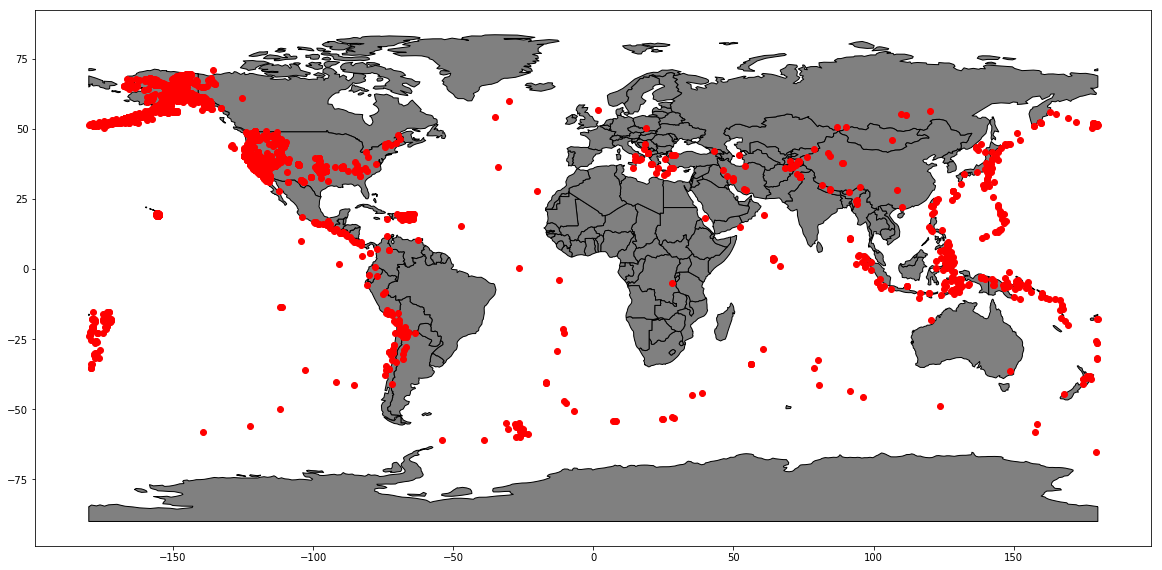

In [115]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(20,10),color='gray', edgecolor='black')


gdf.plot(ax=ax, color='red')
ax.set
plt.show()

## Opdracht - Terrorisme in kaart brengen

De dataset terrorism.csv bevat gegevens van terroristische aanslagen van 1970 tot en met 2017. In deze opdracht zullen we een aantal interessante inzichten in kaart proberen te brengen, zoals de evolutie van het terrorisme, de gevaarlijkste plekken op aarde, de terroristische organisaties die verantwoordelijk zijn voor het meest aantal slachtoffers, enzoverder.

We beginnen eerst met het cleanen van de dataset door inconsistente data te verwijderen of op te vullen. Daarna wordt de data gevisualieerd of wordt de gevraagde informatie uit de dataset gepuurd.

In [2]:
dataset = pd.read_csv('terrorism.csv')
dataset.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [3]:
# Dimensie van de dataset
print(dataset.shape)

(181691, 18)


### Verwijderen of opvullen van missing values

Bepaal het aantal missing values in elke kolom van de dataset.

In [4]:
#  Bepalen van het aantal missing values

missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))


Het aantal ontbrekende waarden in de dataset:
Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64


Verwijder alle rijen uit de dataset waarbij de latitude, de longitude en de stad niet zijn gekend. Verwijderen van rijen op basis van ontbrekende waarden in kolommen kan via dataset.dropna(subset=...)

Bijvoorbeeld verwijderen van alle rijen met ontbrekende waarden in 2 verschillende kolommen:

`dataset_dropna = dataset.dropna(subset = ['kolomnaam1', 'kolomnaam2'])`

In [5]:
# Verwijder alle rijen uit de dataset waarbij de latitude, de longitude en de stad niet is zijn.

dataset = dataset.dropna(subset = ['longitude', 'latitude', 'city'])
missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
Year                0
Month               0
Day                 0
Country             0
Region              0
city                0
latitude            0
longitude           0
AttackType          0
Killed           9779
Wounded         15667
Target            595
Summary         62521
Group               0
Target_type         0
Weapon_type         0
Motive         127101
casualities     16217
dtype: int64


In [6]:
# centrum en spreidingsmaten via describe()

dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,176708.000000,176708.000000,176708.000000,176708.000000,1.767080e+05,166929.000000,161041.000000,160491.000000
mean,2002.899314,6.468173,15.516988,23.511348,-4.600066e+02,2.364209,3.199204,5.291742
std,13.223654,3.388679,8.809175,18.577560,2.050257e+05,11.493996,36.404369,42.551188
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.583333,4.367415e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.488758,4.321485e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.691246,6.865530e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


Vervang de ontbrekende waarden in de kolommen Killed, Wounded en casualties door het gemiddelde van die kolommen.
Je kan dit via dataset=dataset.fillna({'kolomnaam1':gemiddelde_kolom1,'kolomnaam2':gemiddelde_kolom2})

In [7]:
# Vervang de ontbrekende waarden in de kolommen Killed, Wounded en casualties door het gemiddelde van die kolommen.

Killed_mean = dataset['Killed'].mean()
Wounded_mean = dataset['Wounded'].mean()
casualties_mean = dataset['casualities'].mean()

dataset = dataset.fillna({'Killed':Killed_mean,'Wounded':Wounded_mean,'casualties':casualties_mean})
missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
Year                0
Month               0
Day                 0
Country             0
Region              0
city                0
latitude            0
longitude           0
AttackType          0
Killed              0
Wounded             0
Target            595
Summary         62521
Group               0
Target_type         0
Weapon_type         0
Motive         127101
casualities     16217
dtype: int64


### Visualaties en analyse

Gebruik de Seaborn countplot om het aantal terroristische daden per jaar te visualiseren. Gebruik het jaartal op de x-as en het aantal aanslagen op de y-as.

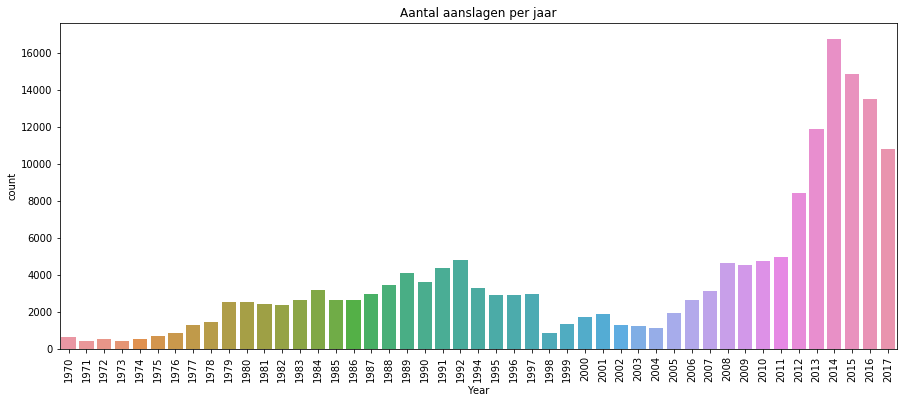

In [8]:
# Grafiek van het aantal terroristische aanslagen per jaar. 
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=dataset)
plt.xticks(rotation=90)
plt.title('Aantal aanslagen per jaar')
plt.show()

Gebruik de Seaborn countplot om de distributie van de gebruikte (aanslag)methode ('AttackType') in kaart te brengen.
Sorteer de countplot van populairste methode naar minst populaire. Het sorteren kan in de countplot via de property `order=dataset['kolomnaam'].value_counts().index`

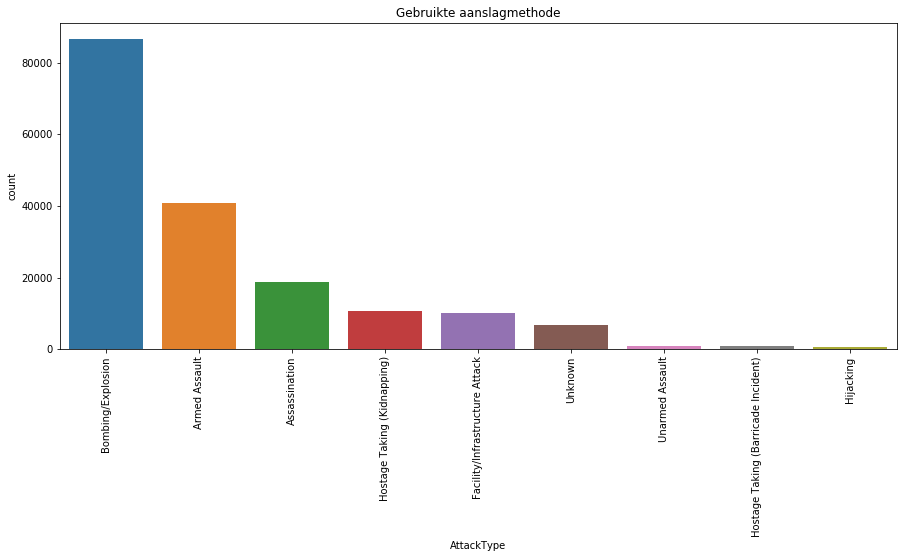

In [9]:
# Distributie van de gebruikte (aanslag)methode ('AttackType'). Sorteer de countplot van populairste methode naar minst populaire.
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=dataset,order=dataset['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Gebruikte aanslagmethode')
plt.show()


Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen. Sorteer de countplot van meest voorkomende doelen naar minst voorkomende doelen.

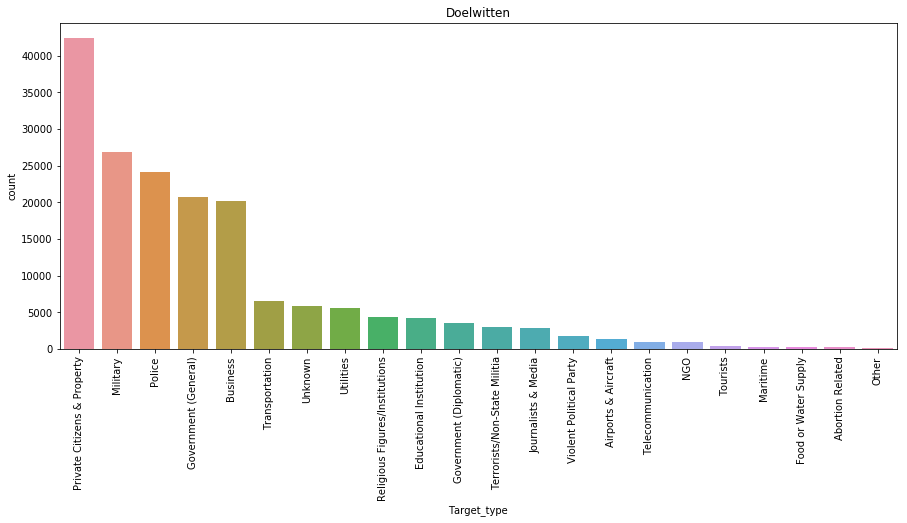

In [10]:
# Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen.
# Sorteer de countplot van meest voorkomende naar minst voorkomende.

plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=dataset,order=dataset['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Doelwitten')
plt.show()


Bepaal welk land het meest met terroristische aanslagen geconfronteerd is geweest.

In [18]:
# Bepaal welk land het meest met terroristische aanslagen is geconfronteerd geweest

print('Het land met de meest terroristische aanslagen:', dataset['Country'].mode()[0])


Het land met de meest terroristische aanslagen: Iraq


Welk land kende het hoogst aantal doden en welke landen het minst?  Groepeer eerst per land via `dataset.groupby(['Country']).sum()`

In [44]:
# In welke landen viel het hoogst aantal doden?
dataset_country = dataset.groupby(['Country']).sum()

country_max = dataset_country[dataset_country['Killed']==dataset_country['Killed'].max()]
country_max = country_max.reset_index()
#country_max.head()
print('Land met het meest aantal doden:', country_max['Country'].values[0])

# In welke landen viel het minst aantal doden?

country_min = dataset_country[dataset_country['Killed']==dataset_country['Killed'].min()]
country_min = country_min.reset_index()

print('Landen met het minst aantal doden:\n ', country_min)

Land met het meest aantal doden: Iraq
Landen met het minst aantal doden:
                  Country   Year  Month  Day    latitude   longitude  Killed  \
0                 Benin  13961     53   97   48.995495   16.276067     0.0   
1                Brunei  11852     51  116  231.689187 -264.281285     0.0   
2      French Polynesia   5985     27   18  -52.604952 -448.708512     0.0   
3               Iceland   7995     20   73  258.352351  -83.349225     0.0   
4            Luxembourg  23845     80  253  595.515019   73.659388     0.0   
5             Mauritius   3977     14    9  -40.675113  115.013170     0.0   
6          New Hebrides   1980      6   30  -17.734818  168.322029     0.0   
7            Seychelles   3962     22   52   -9.233716  110.898780     0.0   
8           South Yemen   1971      6   11   12.825647   44.846416     0.0   
9   St. Kitts and Nevis   1995      6   25   17.300063  -62.730877     0.0   
10              Vanuatu   3992     21   20  -35.469636  336.644058 

Geef de top 10 meeste dodelijk terroristische organisaties in de periode 2000-2017. Groepeer eerst per organisatie ('Group') via `dataset.groupby(['Group']).sum()`
Sorteren kan via de functie `sort_values(by=['Killed']`

In [36]:
# Top 10 meest dodelijke terroristische organisaties in de periode 2000-2017

dataset_group = dataset.groupby(['Group']).sum()
dataset_group = dataset_group.reset_index()

dataset_group.sort_values(by=['Killed'],ascending=False)[:10]


,Group,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
3333,Unknown,162728921,525193,1262499,2.075287e+06,3.007478e+06,116620.794386,221154.138685,308080.0
1504,Islamic State of Iraq and the Levant (ISIL),11253851,36453,88997,1.928866e+05,2.414589e+05,40056.401135,33257.140058,58134.0
3071,Taliban,14861512,49276,116590,2.502512e+05,4.948355e+05,29908.521611,29630.155793,54224.0
693,Boko Haram,4850159,15444,38594,2.769184e+04,3.008391e+04,20722.650199,11520.685738,20248.0
2889,Shining Path (SL),8557925,27754,67332,-5.162834e+04,-3.258327e+05,11263.900227,4503.984451,12440.0
1825,Liberation Tigers of Tamil Eelam (LTTE),3103505,9875,24079,1.297987e+04,1.255449e+05,10780.284175,11093.545867,20456.0
175,Al-Shabaab,6595029,21872,51631,7.850144e+03,1.445507e+05,10776.352581,10407.303438,14515.0
1099,Farabundo Marti National Liberation Front (FMLN),5940127,18640,43836,4.103498e+04,-2.657199e+05,9276.773455,6124.817276,10682.0
3098,Tehrik-i-Taliban Pakistan (TTP),2710492,8448,20888,4.405736e+04,9.524386e+04,6049.463131,9672.764973,15305.0
2228,Nicaraguan Democratic Force (FDN),1343609,4345,9522,8.811347e+03,-5.812325e+04,5320.527907,1597.542073,4610.0


Bepaal hoeveel doden er in België zijn gevallen sinds 1970. Visualiseer het aantal doden per jaar via een barplot https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot. 

In welk jaar vielen in België het meeste aantal doden?

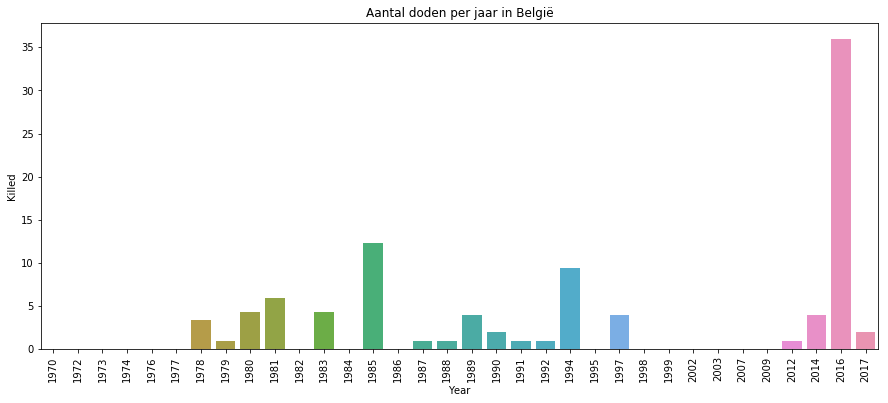

Jaar met het meeste aantal doden in België: 2016


In [65]:
# Totaal aantal doden in België sinds 1970
dataset_country = dataset.groupby(['Country','Year']).sum()
dataset_country = dataset_country.reset_index()

dataset_country.head()


dataset_Belgium = dataset_country[(dataset_country['Country']=='Belgium') ]

dataset_Belgium.head()

plt.subplots(figsize=(15,6))
sns.barplot(x='Year',y='Killed',data=dataset_Belgium)
plt.xticks(rotation=90)
plt.title('Aantal doden per jaar in België')
plt.show()
# Jaar met het meeste aantal doden in België

year_max = dataset_Belgium[dataset_Belgium['Killed']==dataset_Belgium['Killed'].max()].Year.values

print('Jaar met het meeste aantal doden in België:', year_max[0])


Zet alle terroristische activiteit op een wereldkaart. Zorg dat je de kaart per jaar kan weergeven en dat je ook kan filteren op het aantal doden. Bijvoorbeeld: alle plaatsen waar er in 2001 bij een aanslag minstens 200 doden vielen.

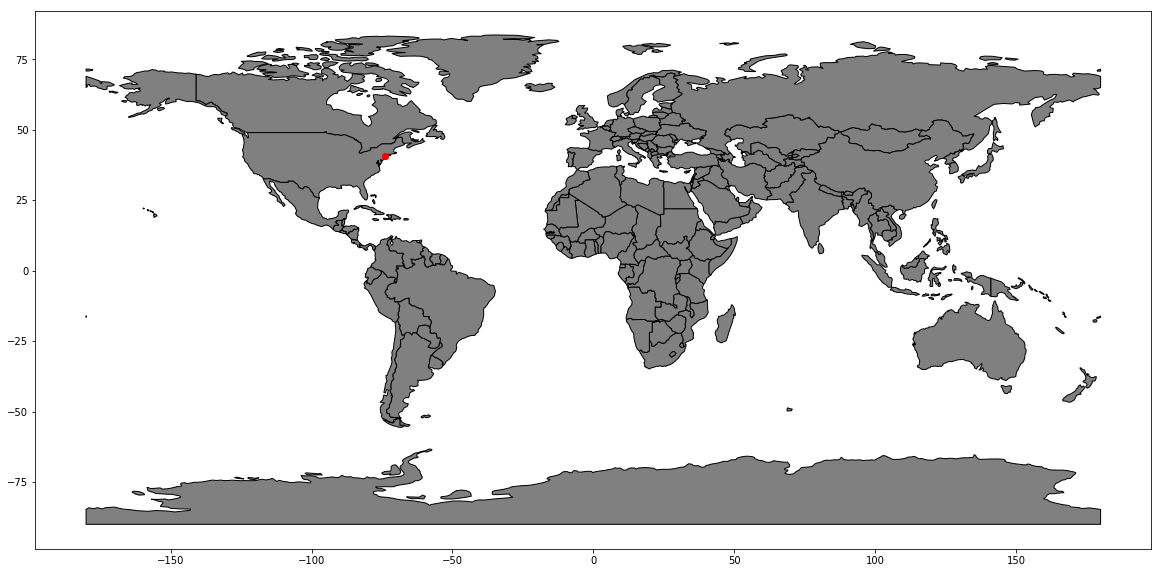

In [92]:
# Zet alle terroristische activiteit op een wereldkaart. Zorg dat je de kaart per jaar kan weergeven.
import geopandas
import matplotlib.pyplot as plt


jaar = 2001
doden = 200

dataset_year = dataset[(dataset['Year']==jaar) & (dataset['Killed']>=doden)]


gdf = geopandas.GeoDataFrame(dataset_year, geometry=geopandas.points_from_xy(dataset_year.longitude, dataset_year.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(figsize=(20,10),color='gray', edgecolor='black')


gdf.plot(ax=ax, color='red')
ax.set
plt.show()

